# Logistic Regression with GridSearchCV Tuning

In [3]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [4]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [11]:
df = pd.read_csv("./Resources/insurance_claims.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [12]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Select your features (columns)

In [13]:
# Set features. This will also be used as your x values.
selected_features = df[['age', 'total_claim_amount', 'auto_year', 'incident_hour_of_the_day', 'injury_claim', 'property_claim', 'vehicle_claim']].dropna()
selected_features

,age,total_claim_amount,auto_year,incident_hour_of_the_day,injury_claim,property_claim,vehicle_claim
0,48,71610,2004,5,6510,13020,52080
1,42,5070,2007,8,780,780,3510
2,29,34650,2007,7,7700,3850,23100
3,41,63400,2014,5,6340,6340,50720
4,44,6500,2009,20,1300,650,4550
...,...,...,...,...,...,...,...
995,38,87200,2006,20,17440,8720,61040
996,41,108480,2015,23,18080,18080,72320
997,34,67500,1996,4,7500,7500,52500
998,62,46980,1998,2,5220,5220,36540


# Create a Train Test Split

Use `koi_disposition` for the y values

In [14]:
X = selected_features
y = df["auto_year"]
print(X.shape, y.shape)

(1000, 7) (1000,)


In [15]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)


# Train the Model



In [17]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression()

# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_minmax, y_train)

training_score = model.score(X_train_minmax, y_train)
testing_score = model.score(X_test_minmax, y_test)

scores = cross_val_score(model, X_train_minmax, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.20


In [18]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.26
Testing Data Score: 0.176


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................................C=0.001; total time=   0.0s
[CV 2/5] END ........................................C=0.001; total time=   0.0s
[CV 3/5] END ........................................C=0.001; total time=   0.0s
[CV 4/5] END ........................................C=0.001; total time=   0.0s
[CV 5/5] END ........................................C=0.001; total time=   0.0s
[CV 1/5] END .........................................C=0.01; total time=   0.0s
[CV 2/5] END .........................................C=0.01; total time=   0.0s
[CV 3/5] END .........................................C=0.01; total time=   0.0s
[CV 4/5] END .........................................C=0.01; total time=   0.0s
[CV 5/5] END .........................................C=0.01; total time=   0.0s
[CV 1/5] END ..........................................C=0.1; total time=   0.0s
[CV 2/5] END ....................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=3)

In [21]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.2986666666666667
{'C': 10}
LogisticRegression(C=10)


In [22]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_minmax)

In [23]:
print('Test Acc: %.3f' % grid.score(X_test_minmax, y_test))

Test Acc: 0.280


In [24]:
predictions = model.predict(X_test_minmax)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1999 2005 2009 2012 2008 2009 2011 2015 2005 2015]
First 10 Actual labels: [2003, 2006, 2007, 2012, 2005, 2010, 2010, 2013, 2005, 2015]


In [25]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,1999,2003
1,2005,2006
2,2009,2007
3,2012,2012
4,2008,2005
...,...,...
245,2008,2006
246,1999,2001
247,2007,2005
248,2015,2013


In [26]:
results.head(10)

,Prediction,Actual
0,1999,2003
1,2005,2006
2,2009,2007
3,2012,2012
4,2008,2005
5,2009,2010
6,2011,2010
7,2015,2013
8,2005,2005
9,2015,2015


In [27]:
results.tail(10)

,Prediction,Actual
240,2011,2014
241,1995,1995
242,1997,2001
243,1995,1998
244,1995,1996
245,2008,2006
246,1999,2001
247,2007,2005
248,2015,2013
249,1995,1999


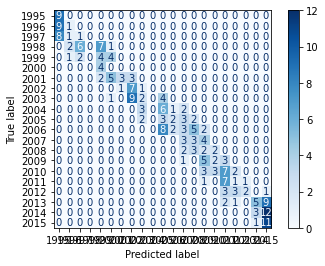

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test_minmax, y_test, cmap="Blues")
plt.show()

Text(0.5, 1.0, 'Residual Plot')

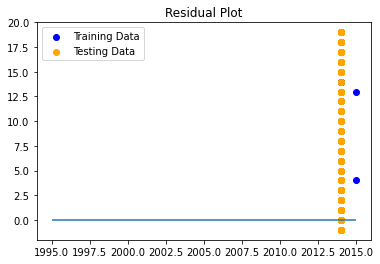

In [30]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [31]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

# Save the Model

In [32]:
# Saving model by updating "your_name" with Adebayo
# and "your_model" with model variable
# if joblib fails to import, run the command to install it in terminal
import joblib
filename = 'Adebayo_LogReg.sav'
joblib.dump(model, filename)

['Adebayo_LogReg.sav']